In [1]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid
import numpy as np
from PIL import Image

c:\Users\Will Poulett\OneDrive - NHS\Documents\Personal Development\diffusion\.env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Will Poulett\OneDrive - NHS\Documents\Personal Development\diffusion\.env\Lib\site-packages\diffusers\models\transformers\transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


In [2]:
pipeline = AutoPipelineForImage2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", variant="fp16", torch_dtype=torch.bfloat16, use_safetensors=True
).to("cuda")

# Run the attention ops without SDPA.
pipeline.unet.set_default_attn_processor()
pipeline.vae.set_default_attn_processor()

Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]


In [3]:
init_image = load_image("images/dog_cat.png")

In [4]:
#prompt = "Photograph of a very old dog with grey hair, detailed, 8k"
#prompt = "A dog wearing sunglasses, detailed, 8k"
#prompt = "A dog wearing a wizard hat. He looks like gandalf. He has a magic wand and a staff. detailed, 8k"
prompt = "Pet, detailed, 4k"

negative_prompt = "ugly, deformed, disfigured, poor details, bad anatomy, cartoon"

In [5]:
strength = 0.7
# strength is one of the most important parameters to consider and it’ll have a huge impact on your generated image.
# It determines how much the generated image resembles the initial image.
guidance_scale = 10
# The guidance_scale parameter is used to control how closely aligned the generated image and text prompt are

In [6]:
images = pipeline(prompt,
                    num_images_per_prompt = 2,
                    negative_prompt = negative_prompt,
                    image=init_image,
                    strength = strength,
                    guidance_scale = guidance_scale,
                    ).images

c:\Users\Will Poulett\OneDrive - NHS\Documents\Personal Development\diffusion\.env\Lib\site-packages\diffusers\pipelines\stable_diffusion\pipeline_stable_diffusion_img2img.py:766: FutureWarning: You have passed 2 text prompts (`prompt`), but only 1 initial images (`image`). Initial images are now duplicating to match the number of text prompts. Note that this behavior is deprecated and will be removed in a version 1.0.0. Please make sure to update your script to pass as many initial images as text prompts to suppress this warning.
  deprecate("len(prompt) != len(image)", "1.0.0", deprecation_message, standard_warn=False)
  0%|          | 0/35 [00:00<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 1.17 GiB. GPU 

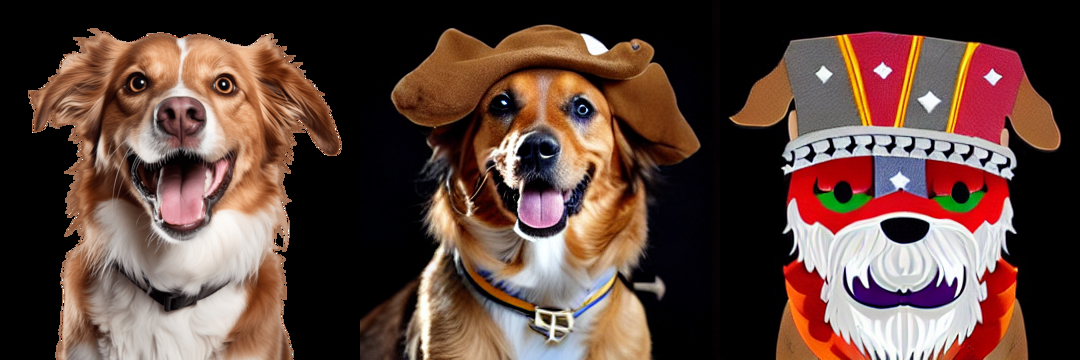

In [ ]:
make_image_grid([init_image] + images, rows=1, cols=3)

In [59]:
dog_image = load_image("images/dog_jpg.jpg").resize((360,360))
cat_image = load_image("images/cat-face.jpg").resize((360,360))
mix = 0.5 * np.array(dog_image) + 0.5 * np.array(cat_image)

# Step 1: Compute min and max values
min_val = np.min(mix)
max_val = np.max(mix)

# Step 2: Scale the array to 0-255
mix = ((mix - min_val) / (max_val - min_val)) * 255

mix_init = Image.fromarray(mix.astype(np.uint8))


In [257]:
#prompt = "Photograph of a very old dog with grey hair, detailed, 8k"
# prompt = "A monster. There are strong dog features and strong cat features. detailed, 8k"
prompt = "Pet with features from dogs and from cats, detailed, 8k."


negative_prompt = "ugly, poor details, bad anatomy, cartoon, diagram, object"

In [258]:
strength =  0.7
# strength is one of the most important parameters to consider and it’ll have a huge impact on your generated image.
# It determines how much the generated image resembles the initial image.
guidance_scale = 10
# The guidance_scale parameter is used to control how closely aligned the generated image and text prompt are

In [271]:
images = pipeline(prompt,
                    num_images_per_prompt = 2,
                    negative_prompt = negative_prompt,
                    image=mix_init,
                    strength = strength,
                    guidance_scale = guidance_scale).images

100%|██████████| 35/35 [00:08<00:00,  4.23it/s]


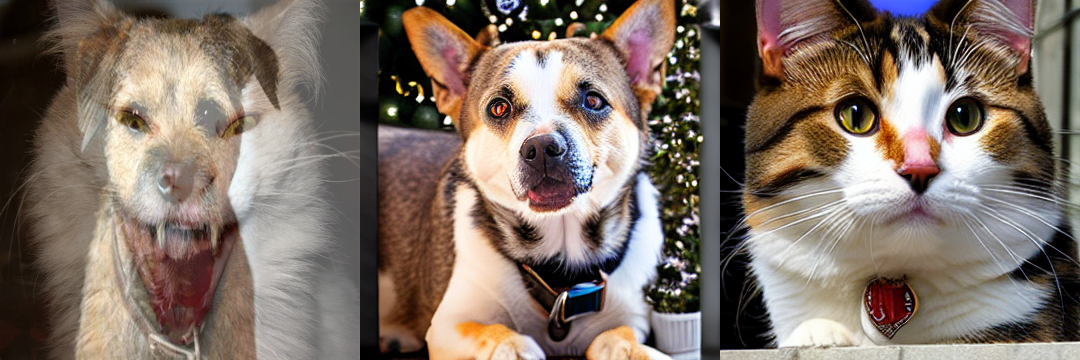

In [272]:
make_image_grid([mix_init] + images, rows=1, cols=3)